In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import pointbiserialr
from scipy.stats import chi2_contingency
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
dataDF = pd.read_csv("./../Dataset/iphone_purchase_records.csv")

  ###      Exploratory Data Analysis

### 1. Summary Statistics

In [3]:
dataDF.describe()

# Age : 25 percentile--> 25% of the people are having age less than or equal to 29.75
# 50% of people are younger than or equal to 37 years.

# Purchase Iphone :75 percentile --> 75% of the people phone purchase status is less than or equal to 1. So 75% of the people didn't purchase IPhone

,Age,Salary,Purchase Iphone
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [4]:
dataDF["Purchase Iphone"].value_counts() 
#unbalanced dataset

Purchase Iphone
0    257
1    143
Name: count, dtype: int64

### 2. Missing Values

In [5]:
dataDF.isnull().sum()

Gender             0
Age                0
Salary             0
Purchase Iphone    0
dtype: int64

<Axes: >

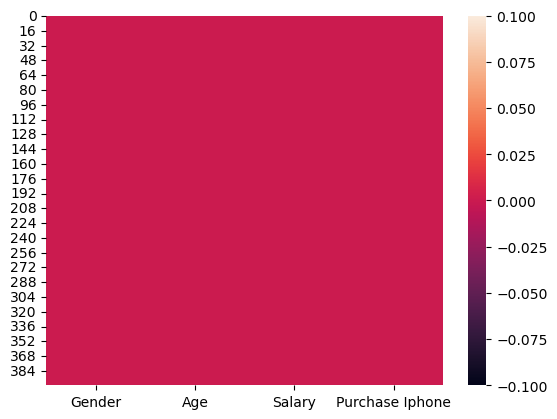

In [6]:
sns.heatmap(dataDF.isnull())

### 3. Features and target correlation analysis

 ### -------------------------       AGE v/s Purchase IPhone Analysis       ------------------------------------------------

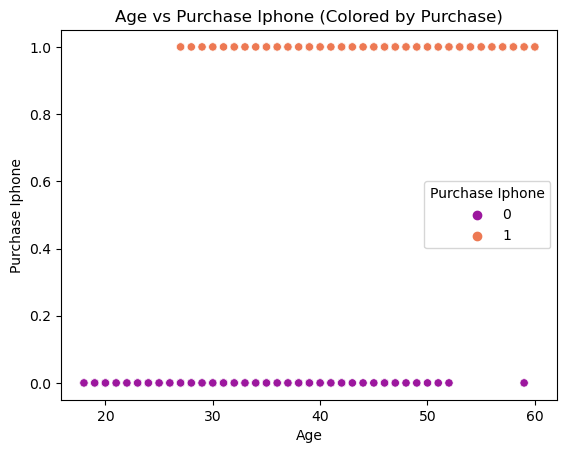

In [7]:
sns.scatterplot(data=dataDF, x="Age", y="Purchase Iphone", hue="Purchase Iphone", palette="plasma")
plt.title("Age vs Purchase Iphone (Colored by Purchase)")
plt.show()

### 1. Use .corr() for numeric correlations (Pearson)

In [8]:
dataDF["Age"].corr(dataDF["Purchase Iphone"])

# By default, this uses the Pearson correlation coefficient
# Age and Purchase Iphone are strongly correlated

0.6224541988845291

Quick Range Guide (Correlation Strength):

| Correlation (r) | Interpretation      |
|-----------------|---------------------|
| 0.0 to ±0.2     | Very weak           |
| ±0.2 to ±0.4    | Weak to moderate    |
| ±0.4 to ±0.6    | Moderate            |
| ±0.6 to ±0.8    | Strong              |
| ±0.8 to ±1.0    | Very strong         |

### 2. Point-Biserial Correlation (when target is binary)

In [9]:
pointbiserialr(dataDF["Age"], dataDF["Purchase Iphone"])

#This is equivalent to Pearson, but Point-Biserial Correlation more accurate when one variable is binary (like Purchase Iphone).
# here r = statistic = 0.622

SignificanceResult(statistic=0.6224541988845291, pvalue=2.800233943272445e-44)

 **Point-Biserial Correlation Range & Interpretation**

| Correlation (r) | Strength        | Direction      |
|-----------------|------------------|----------------|
| `+0.00 to +0.19` | Very Weak        | Positive       |
| `+0.20 to +0.39` | Weak             | Positive       |
| `+0.40 to +0.59` | Moderate         | Positive       |
| `+0.60 to +0.79` | Strong           | Positive       |
| `+0.80 to +1.00` | Very Strong      | Positive       |
| `-0.00 to -0.19` | Very Weak        | Negative       |
| `-0.20 to -0.39` | Weak             | Negative       |
| `-0.40 to -0.59` | Moderate         | Negative       |
| `-0.60 to -0.79` | Strong           | Negative       |
| `-0.80 to -1.00` | Very Strong      | Negative       |

 ### -------------------------------  Gender v/s Purchase IPhone Analysis ------------------------------------------------

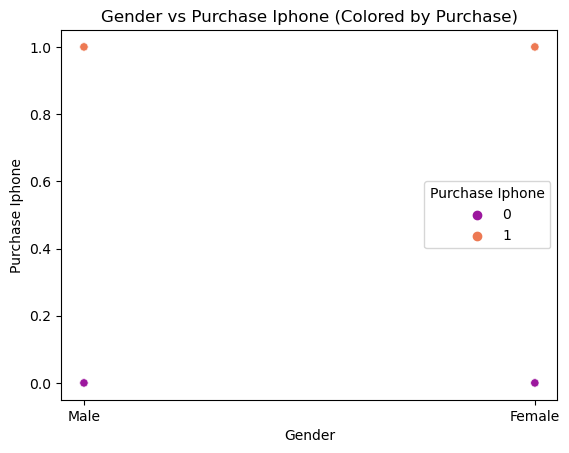

In [10]:
sns.scatterplot(data=dataDF, x="Gender", y="Purchase Iphone", hue="Purchase Iphone", palette="plasma")
plt.title("Gender vs Purchase Iphone (Colored by Purchase)")
plt.show()

In [11]:
# since Gender is categorical value, we cannot directly apply Pearson correlation coefficient. Either we have to convert to numerical value or use different approach like Chi-Square 

# Contingency table
ct = pd.crosstab(dataDF["Gender"], dataDF["Purchase Iphone"])

print(ct)
print("---------------------------")

# Chi-Square test
chi2, p, dof, expected = chi2_contingency(ct)

print()
print("Chi-Square value:", chi2)
print("p-value:", p)


# If p-value < 0.05, you can say there’s a statistically significant association between gender and phone purchase.
# Hence, There is no statistically significant association between Gender and Purchase Iphone.

Purchase Iphone    0   1
Gender                  
Female           127  77
Male             130  66
---------------------------

Chi-Square value: 0.5550869364098915
p-value: 0.45624659183130645


 ### -------------------------------  Salary v/s Purchase IPhone Analysis ------------------------------------------------

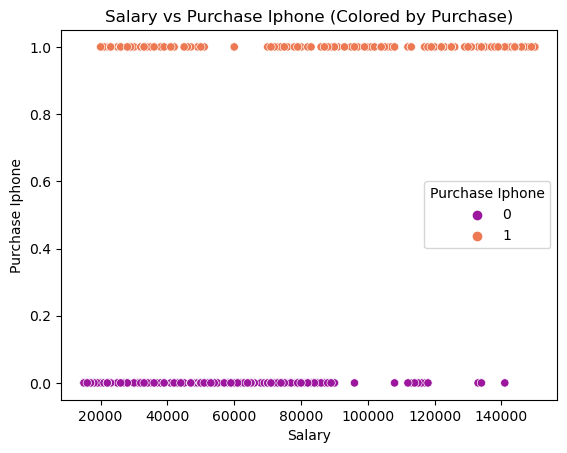

In [12]:
sns.scatterplot(data=dataDF, x="Salary", y="Purchase Iphone", hue="Purchase Iphone", palette="plasma")
plt.title("Salary vs Purchase Iphone (Colored by Purchase)")
plt.show()

In [13]:
dataDF["Salary"].corr(dataDF["Purchase Iphone"])

# Salary and Purchase Iphone are correlated Weakly to moderately

0.36208302580467916

In [14]:
pointbiserialr(dataDF["Salary"], dataDF["Purchase Iphone"])

#This is equivalent to Pearson, but Point-Biserial Correlation more accurate when one variable is binary (like Purchase Iphone).

SignificanceResult(statistic=0.36208302580467794, pvalue=7.772785450067196e-14)

### -----------------------------         Age vs Salary         --------------------------------------

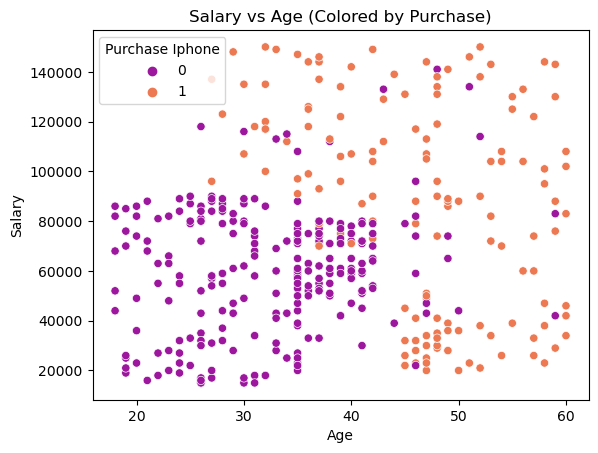

In [15]:
sns.scatterplot(data=dataDF, x="Age", y="Salary", hue="Purchase Iphone", palette="plasma")
plt.title("Salary vs Age (Colored by Purchase)")
plt.show()

In [16]:
dataDF["Salary"].corr(dataDF["Age"])

# Salary and Age are correlated Poorly

0.15523801797209985

In [17]:
dataDF[["Salary", "Age", "Purchase Iphone"]].corr()

#This returns a correlation matrix between all numeric columns.
#Salary vs Age
#Salary vs Purchase Iphone
#Age vs Purchase Iphone

,Salary,Age,Purchase Iphone
Salary,1.000000,0.155238,0.362083
Age,0.155238,1.000000,0.622454
Purchase Iphone,0.362083,0.622454,1.000000


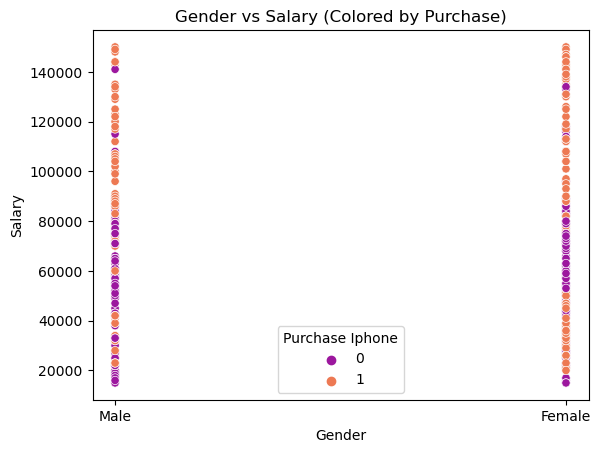

In [18]:
sns.scatterplot(data=dataDF, x="Gender", y="Salary", hue="Purchase Iphone", palette="plasma")
plt.title("Gender vs Salary (Colored by Purchase)")
plt.show()

### Correlation between all numerical features and target

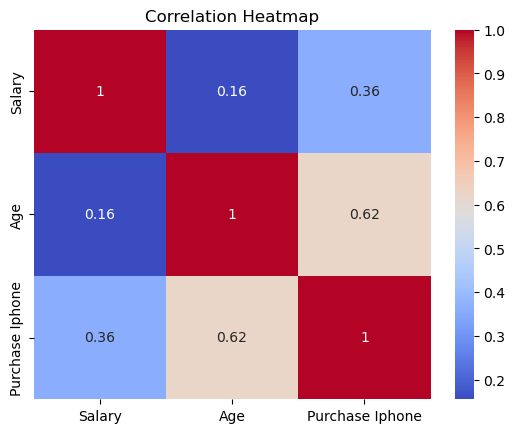

In [19]:
corr_matrix = dataDF[["Salary", "Age", "Purchase Iphone"]].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

### Correlation between all features and target

<Axes: >

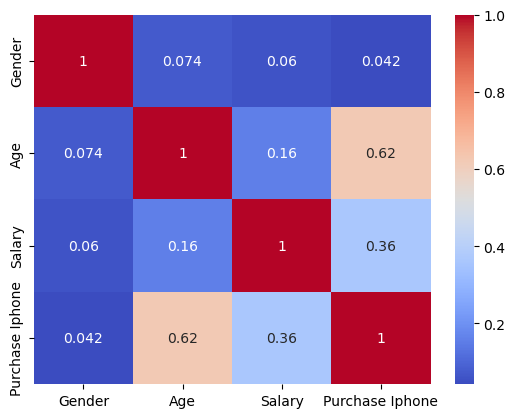

In [20]:
dataDF["Gender"] = dataDF["Gender"].map({"Male": 0, "Female": 1})
# HEATMAP can be used only for numeric so gender value is converted to numeric values
sns.heatmap(dataDF.corr(), annot=True, cmap="coolwarm")

### Pairplot

C:\Users\keerthana.r\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


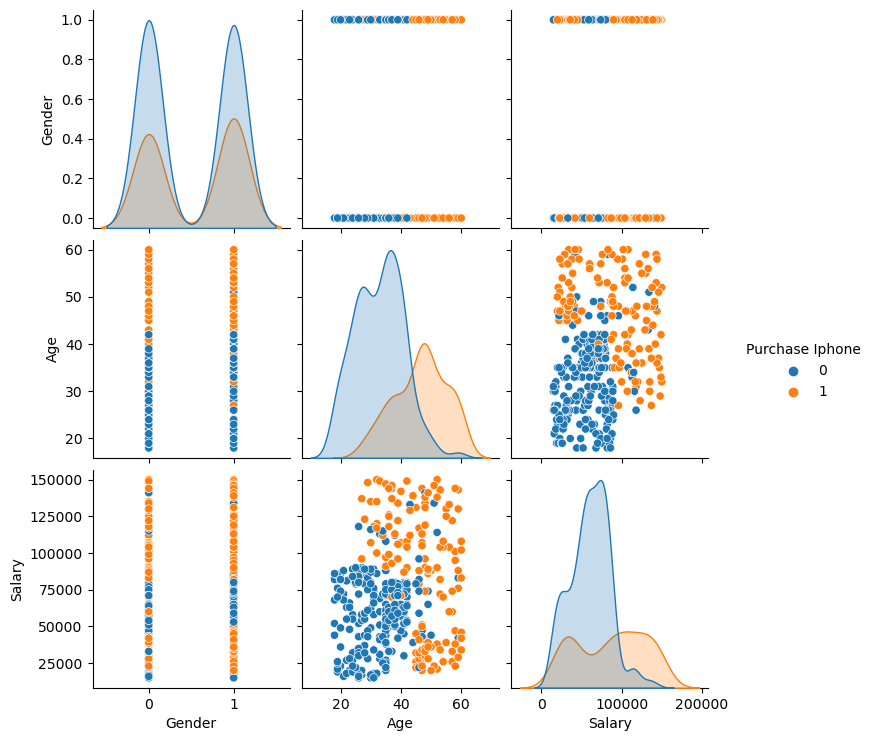

In [21]:
sns.pairplot(dataDF, hue="Purchase Iphone")

In [40]:
dataDF

,Gender,Age,Salary,Purchase Iphone
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0
...,...,...,...,...
395,1,46,41000,1
396,0,51,23000,1
397,1,50,20000,1
398,0,36,33000,0


In [73]:
trainData, testData = train_test_split(dataDF)
testData

,Gender,Age,Salary,Purchase Iphone
217,0,40,78000,0
23,1,45,22000,1
16,0,47,25000,1
232,0,40,107000,1
367,0,46,88000,1
...,...,...,...,...
14,0,18,82000,0
184,1,33,60000,0
87,1,28,85000,0
278,1,52,38000,1


### Building KNN Model 

In [24]:
trainData.isnull().sum()

Gender             0
Age                0
Salary             0
Purchase Iphone    0
dtype: int64

In [25]:
testData.isnull().sum()

Gender             0
Age                0
Salary             0
Purchase Iphone    0
dtype: int64

In [26]:
def knn_model(train,test,k):
    train["Distance"] = np.nan
    test["PredictedValue"] = np.nan
    n = len(test)
    m = len(train)
    for j in range (n):
        q = (test["Gender"].iloc[j],test["Age"].iloc[j],test["Salary"].iloc[j])
        for i in range (m):
            p = (train["Gender"].iloc[i],train["Age"].iloc[i],train["Salary"].iloc[i])
            train.iloc[i, train.columns.get_loc("Distance")] = math.dist(p, q)
        
        train = train.sort_values(by='Distance')
        test.iloc[j, test.columns.get_loc("PredictedValue")] = train["Purchase Iphone"].head(k).mode()[0]
    
    return test

### 1. KNN Model (without feature scaling and features selection)

In [34]:
trainData1 = trainData.copy()
testData1 = testData.copy()
model1 = knn_model(trainData1,testData1,6)
# accuracy test
accuracy1 = accuracy_score(model1["Purchase Iphone"],model1["PredictedValue"])
accuracy1

0.8

### 2. KNN Model (with feature scaling and without features selection)

### a. min-max normalization

In [28]:
from sklearn.preprocessing import MinMaxScaler 

In [74]:
trainData2 = trainData.copy()
testData2 = testData.copy()

In [75]:
# feature scaling : min-max normalization
scaler = MinMaxScaler()

# Fit only on train
scaled_trainData = scaler.fit_transform(trainData2)
trainData2 = pd.DataFrame(scaled_trainData, columns=trainData.columns)

# Transform test
scaled_testData = scaler.transform(testData2)
testData2 = pd.DataFrame(scaled_testData, columns=testData.columns)

In [76]:
model2 = knn_model(trainData2,testData2,6)
# accuracy test
accuracy2 = accuracy_score(model2["Purchase Iphone"],model2["PredictedValue"])
accuracy2

0.92

### b. z-score normalization

In [42]:
from sklearn.preprocessing import StandardScaler

standScaler = StandardScaler()

In [43]:
trainData3 = trainData.copy()
testData3 = testData.copy()

## z-score standardization
ztrainScaled = standScaler.fit_transform(trainData3)
trainData3 = pd.DataFrame(ztrainScaled, columns=trainData.columns)

ztestScaled = standScaler.transform(testData3)
testData3 = pd.DataFrame(ztestScaled, columns=testData.columns)

In [45]:
model3 = knn_model(trainData3,testData3,6)

# accuracy test
# to calculate accuracy we need discrete values, so we are converting continuous value to discrete values
model3["Purchase Iphone"] = model3["Purchase Iphone"].apply(lambda x: 1 if x > 0 else 0)
model3["PredictedValue"] = model3["PredictedValue"].apply(lambda x: 1 if x > 0 else 0)
accuracy3 = accuracy_score(model3["Purchase Iphone"],model3["PredictedValue"])
accuracy3

0.92

The difference in accuracy between z-score normalization and min-max normalization in your KNN model is due to how these normalization techniques scale the features and how KNN relies on distances for classification. Here's why this happens:

1. How KNN Works:
KNN is a distance-based algorithm, and the accuracy of the model depends heavily on how distances are calculated between data points. The scaling of features directly affects the distance calculations.

Z-score normalization scales features to have a mean of 0 and a standard deviation of 1. It is sensitive to outliers because outliers can significantly affect the mean and standard deviation.
Min-max normalization scales features to a fixed range, typically [0, 1]. It compresses the range of features and ensures all features contribute equally to the distance calculation.


2. Why Accuracy Differs:
The difference in accuracy arises because the two normalization techniques handle the distribution of feature values differently, which affects the relative importance of features in the distance calculation.

Z-score Normalization:
Z-score normalization standardizes the data by centering it around the mean and scaling it by the standard deviation.
If your dataset has features with a normal distribution, z-score normalization works well because it preserves the relative distances between points.
However, if your dataset has outliers, z-score normalization can be affected because outliers influence the mean and standard deviation.
Min-max Normalization:
Min-max normalization scales all features to the same range, typically [0, 1].
This ensures that all features contribute equally to the distance calculation, regardless of their original range or distribution.
Min-max normalization is less sensitive to outliers compared to z-score normalization because it only considers the minimum and maximum values of the feature.


3. Why Min-max Normalization Performs Better in Your Case:
Feature Distribution: If your features are not normally distributed or have outliers, min-max normalization may perform better because it does not rely on the mean and standard deviation.
Feature Importance: Min-max normalization ensures that all features contribute equally to the distance calculation. If one feature has a larger range or variance, z-score normalization might give it more weight, which could negatively impact the model's performance.
Dataset Characteristics: The specific characteristics of your dataset (e.g., the range and distribution of Gender, Age, and Salary) might make min-max normalization more suitable for your KNN model.

4. When to Use Each Normalization Technique:
Use Z-score Normalization:

When features are normally distributed.
When you want to account for the variance of features.
When outliers are not a significant concern.
Use Min-max Normalization:

When features have different ranges and you want to scale them to the same range.
When the dataset contains outliers.
When you want all features to contribute equally to the distance calculation.


5. What You Can Do:
To better understand why min-max normalization performs better in your case, you can:

Analyze Feature Distributions:
Plot histograms or boxplots of your features (Gender, Age, Salary) to see their distributions and check for outliers.
Experiment with Different Distance Metrics:
KNN uses Euclidean distance by default, but you can try other distance metrics (e.g., Manhattan distance, Minkowski distance) to see if they improve performance.
Cross-validate:
Use cross-validation to ensure that the observed difference in accuracy is consistent across different splits of the data.

Summary:
The difference in accuracy between z-score normalization and min-max normalization in your KNN model is due to how these techniques scale the features and how KNN relies on distances for classification. Min-max normalization performs better in your case likely because it handles feature scaling and outliers more effectively for your dataset.

### ✅ Quick Answer:
The slight change in accuracy between **Z-score normalization (Standardization)** and **Min-Max scaling** is due to **how KNN computes distances**, and how those distances change when feature values are scaled differently.

---

### 🧠 Why This Happens (in KNN):

KNN is a **distance-based algorithm**, usually using **Euclidean distance**. The scaling of your features **directly affects** how the distances are calculated, and in turn, how neighbors are chosen.

#### 1. **Min-Max Scaling**
- Rescales all features to a fixed range, usually `[0, 1]`.
- All features contribute **equally** to the distance (since they’re in the same range).
- More sensitive to **outliers**, but preserves **relative distances** better if data is compact.

#### 2. **Z-Score Normalization (StandardScaler)**
- Transforms features to have **mean = 0** and **std = 1**.
- More robust to outliers (as large values are shrunk if variance is high).
- Can emphasize features with **low variance**, because they get scaled up.

---

### 📊 Why the Accuracy Changes:
Because of the difference in scaling:

- In **Min-Max**, a feature like “Salary” might have values from 0 to 1.
- In **Z-score**, that same “Salary” might be scaled to -0.3 to +1.2, depending on the distribution.

This causes different **K nearest neighbors** to be selected — even for the same data — resulting in slightly different predictions and accuracy.

---

### 🎯 Which One to Use?

- **Min-Max Scaling** is generally better when you know your data is bounded (e.g., age 0–100, salary within limits).
- **Z-score** is often better if your features have **different units or scales** (e.g., Age in years, Salary in thousands).

---

### ✅ Final Thought:
The difference you're seeing (0.92 vs 0.93) is **normal and expected** — and it’s why it’s good practice to **try both scalings** during model development and pick the one that works best for your data.

Let me know if you want to try auto-scaling selection or visualize the impact on neighbors!

### 2. KNN Model (with feature scaling and with features selection)

In [77]:
trainData4 = trainData.copy()
testData4 = testData.copy()

# selecting only salary and Age by making Gender value zero
trainData4["Gender"] = 0
testData4["Gender"] = 0

In [78]:
# feature scaling : min-max normalization
scaler = MinMaxScaler()

# Fit only on train
scaled_trainData = scaler.fit_transform(trainData4)
trainData4 = pd.DataFrame(scaled_trainData, columns=trainData.columns)

# Transform test
scaled_testData = scaler.transform(testData4)
testData4 = pd.DataFrame(scaled_testData, columns=testData.columns)

In [86]:
model4 = knn_model(trainData4,testData4,10)
# accuracy test
accuracy4 = accuracy_score(model4["Purchase Iphone"],model4["PredictedValue"])
accuracy4

0.93